In [1]:
import pandas as pd
import numpy as np
import random
import time
from numpy.linalg import svd
from matplotlib import pyplot as plt
from scipy import sparse
from numpy.linalg import matrix_rank
from scipy.sparse import csr_matrix
from scipy.spatial.distance import cosine
import scipy

# Step 1

<span style="color:black; font-weight:700;font-size:18px">  Για αρχή διαβάζουμε το αρχείο phily_users_businesses_stars.csv </span>

In [2]:
df = pd.read_csv('phily_users_businesses_stars.csv')

<span style="color:black; font-weight:700;font-size:18px"> Βλέπουμε ότι έχει 967552 γραμμές και 3 στήλες </span>

In [3]:
print(len(df.index))
df.head()

967552


,user_id,business_id,stars
0,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
2,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0
3,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
4,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0


<span style="color:black; font-weight:700;font-size:18px"> Τώρα επαναληπτικά κάνουμε την παρακάτω διαδικασία, αφαιρούμε όσα user_id δεν εμφανίζονται πάνω από 15 φορές, δηλαδή όσοι χρήστες δεν έχουν κάνει πάνω από 15 reviews και μετά αφαιρούμε όσα business_id δεν εμφανίζονται πάνω από 15 φορές, δηλαδή όσες επιχειρήσεις δεν έχουν πάνω από 15 reviews. Την διαδικασία την κάνουμε επαναληπτικά επειδή μετά από το φιλτράρισμα των business υπάρχει περίπτωση επειδή αφαιρέθηκαν κάποιες γραμμές, κάποια user_id να ΜΗΝ εμφανίζονται πάνω από 15 φορές, με αποτέλεσμα να χρειάζονται να αφαιρεθούν. Κάνουμε αυτήν την επανάληψη έως ότου σταθεροποιηθεί στις 302141 τριάδες. </span>

In [4]:
for i in range(10):
    df.columns
    # another way 
    df = df[df.user_id.isin(df.user_id.value_counts().loc[lambda x: x > 15].index)]
    #df = df[df.groupby('user_id')['user_id'].transform('size').gt(15)]
    print(len(df.index))
    # another way 
    df = df[df.business_id.isin(df.business_id.value_counts().loc[lambda x: x > 15].index)]
    #df = df[df['business_id'].map(df['business_id'].value_counts()).gt(15)]
    print(len(df.index))
    df = df.dropna()
    print("#####################################")

378375
328838
#####################################
308626
304657
#####################################
302887
302440
#####################################
302231
302156
#####################################
302141
302141
#####################################
302141
302141
#####################################
302141
302141
#####################################
302141
302141
#####################################
302141
302141
#####################################
302141
302141
#####################################


<span style="color:black; font-weight:700;font-size:18px"> Έχουμε σωστά όπως λέει η εκφώνηση 6961 user_id. </span>

In [5]:
N = df.drop_duplicates(subset = ['user_id'])
print(N)

                       user_id             business_id  stars
3       smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ    4.0
5       IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg    5.0
6       vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w    5.0
7       aFa96pz67TwOFu4Weq5Agg  kq5Ghhh14r-eCxlVmlyd8w    5.0
10      ZGjgfSvjQK886kiTzLwfLQ  EtKSTHV5Qx_Q7Aur9o4kQQ    5.0
...                        ...                     ...    ...
315244  t1WnICmmk7gYAbZQQmgp9w  IkY2ticzHEn4QFn8hQLSWg    2.0
315831  iEONL-v4W46yliYsovCP_g  uIFRFef7l43YxA8G3dU6Tg    4.0
329210  x6l8JBhG5QJp4tjEbwiv4A  3FKIev7ZB_KE6XHL9sUJCg    4.0
338276  SxY-gdlcWLJG4X3lrPzILw  qsAZNQ-6P4I9r7onkBZJ_g    4.0
354912  iVlb7TBX38PCXp_yfSEcPg  3j08Cje2YWUuRxV60BiVFw    5.0

[6961 rows x 3 columns]


<span style="color:black; font-weight:700;font-size:18px"> Έχουμε σωστά όπως λέει η εκφώνηση 4064 business_id. </span>

In [6]:
M = df.drop_duplicates(subset = ['business_id'])
print(M)

                       user_id             business_id  stars
3       smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ    4.0
5       IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg    5.0
6       vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w    5.0
7       aFa96pz67TwOFu4Weq5Agg  kq5Ghhh14r-eCxlVmlyd8w    5.0
10      ZGjgfSvjQK886kiTzLwfLQ  EtKSTHV5Qx_Q7Aur9o4kQQ    5.0
...                        ...                     ...    ...
945650  JiPMk9WmbJu-VfTRAKpZpw  3ut1fzbMfQ1VhFvHpeLOMw    4.0
945903  Gflk362qyCMGLF1bxJJEhw  ABSiUVpGvn4waVJkLktMYg    4.0
948599  Qx5RP0y3VzyKplHYD9WHlg  KTgZXj6xh8aN_tLfI-YZ1Q    4.0
949947  Ns7JZ_BvgI9S6-Rbck4EuQ  saVXla5i8TjE51S5uCaf6w    5.0
950044  _yRKTBGymWyWoBj2YJFCmQ  EAmx_lbvIBPX7wimjt3cxQ    4.0

[4064 rows x 3 columns]


In [7]:
df.to_csv("dataset.csv")

# Step 2

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το αρχείο dataset.csv. </span>

In [8]:
df = pd.read_csv('dataset.csv')

In [9]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,user_id,business_id,stars
0,3,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
1,5,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0
2,6,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5.0
3,7,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0
4,10,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0


In [10]:
df = df.drop("Unnamed: 0", axis='columns')
df.columns

Index(['user_id', 'business_id', 'stars'], dtype='object')

<span style="color:black; font-weight:700;font-size:18px">Μετατρέπουμε το dataframe σε λίστα, μια λίστα από τριάδες user_id, business_id, stars και μετα το κάνουμε shuffle για να είναι πιο ομοιόμορφα κατανομημένα. </span>

In [11]:
dfList = df.values.tolist()

random.shuffle(dfList)

<span style="color:black; font-weight:700;font-size:18px"> Χωρίζουμε το dataset σε train_set, το 90% του σετ και σε test_set το 10% του σετ.</span>

In [12]:
tenPer = int(0.1*len(dfList))

test_set = dfList[:tenPer]
train_set = dfList[tenPer:]
print("Whole set:",len(dfList),"train_set:",len(train_set),"test_set:",len(test_set))

Whole set: 302141 train_set: 271927 test_set: 30214


In [13]:
train_set_df = pd.DataFrame(train_set)
test_set_df = pd.DataFrame(test_set)

In [14]:
train_set_df.head

<bound method NDFrame.head of                              0                       1    2
0       A4WMwbeMsE8NZ8DJfOMONg  X6_5_b4gVKo83VPn0FyONw  5.0
1       Vcx1j2gpPpZpBtPDDDSd6A  sdWuLh-auc0nC2Jy6_26AQ  5.0
2       UR5I5oboRkjVwNjUwFdZPg  t6v8g8UeNiq3O2GoEc7R4Q  4.0
3       1CmhdHhJHokf2mkemRiY3g  GoYSJ-YY-YwbxdgasHuq-Q  4.0
4       fwj7uEDPg-6AO7rzts9FmQ  nsH0hQ7xB5LS2_Ba3mqHTQ  5.0
...                        ...                     ...  ...
271922  nbhYqnnpHT4wYHkT-ORcqQ  YDisPepPeWeELiVGycxOlw  4.0
271923  89aoy6WORObOOdU5yPQxoQ  poviu-6n3iaRE4gdQz6OYw  5.0
271924  _Od4VGV444wsrc3oOYzsaA  LM54ufrINJWoTN5imV8Etw  5.0
271925  hMwD1ffKead6Q2dQL_XIDw  _V6hl1oGkTV2KbGeax_HPA  4.0
271926  qRtevK9LFJd8F5wa0ltPyw  _n539Sga7PCvHQs--a4qkA  5.0

[271927 rows x 3 columns]>

In [15]:
test_set_df.head

<bound method NDFrame.head of                             0                       1    2
0      6WG2IGTVr-xKn0pYQZJGjw  uXgdMfqsY2SCcyooURjZOw  1.0
1      y3Wtx1pOvTiqsJRkjceXiw  9qXd3Frdpw2NFesclk7nPg  5.0
2      yGTCTMk8QYXVaRB1ZW1QCQ  cbmnzbkml6_KtHaRIGXxgQ  3.0
3      adMjyYAea_A0a36MrR5zBg  Sv1MEZP-mMfp8SmE0hwYEA  3.0
4      1L84JcuSzsgsF3WsRK5Rug  dQZlvOEVNke30MY5iTiy1g  5.0
...                       ...                     ...  ...
30209  b8aCjlTJDA0hoZLMAE-iLg  gGyqnAlpFrka_qzpO7j4lQ  5.0
30210  UqTvUrtM9VZfcnjMyvfZxA  4SQ5uczVt66-GGGeNQRfEA  1.0
30211  Mj8mM0pGHEsTLn5uuU9mdw  aJV-u_8zf5vVIaHy7Hs8qw  5.0
30212  qIossUhtsJ55_ciRTEqiPQ  yjXSQDwuI49poc3MA7AGdw  5.0
30213  nJ6EeobDAerJ3vKe2LQf2Q  ldr7iDtxFXX-q7tJuXqlGQ  4.0

[30214 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Αποθηκεύουμε τα train/test set. </span>

In [16]:
train_set_df.to_csv("my_train_set.csv")

In [17]:
test_set_df.to_csv("my_test_set.csv")

# Step 3

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε τα fixed train/test set από την εκφώνηση. </span>

In [18]:
train_set = pd.read_csv("phily_users_businesses_stars_train.csv")
test_set = pd.read_csv("phily_users_businesses_stars_test.csv")

<span style="color:black; font-weight:700;font-size:18px"> Εδώ δημιουργούμε τον πίνακα με τις μέσες τιμές των user_id. Κάνουμε group_by και μέσα σε κάθε υπό-DataFrame του user_id βρίσκουμε το μέσο όρο της στήλης stars. </span>

In [19]:
user_groups = train_set.groupby('user_id')
user_scores_dic = {'user_id':[],'mean_star':[]}

for user_id, user_data in user_groups:
    #tmp.append(user_id)
    #tmp.append(user_data['stars'].mean())
    user_scores_dic['user_id'].append(user_id)
    user_scores_dic['mean_star'].append(user_data['stars'].mean())

#user_scores = pd.DataFrame(user_scores_dic, columns = ['user_id','mean_star'])
user_scores = pd.DataFrame.from_dict(user_scores_dic)
user_scores.columns = ['user_id','mean_star']

In [20]:
user_scores.head()

,user_id,mean_star
0,-2cKJFFNJ9XVyWBt62mWvA,4.481481
1,-4qa2JVDEC_QPVWcZ1nHkQ,3.232558
2,-6GY04bTPM2Zo4z0GN4a1A,4.416667
3,-6nlh2IbzCbGhWndMLZt1g,4.076923
4,-7-d8x5w5c9QolAMgPTKZg,3.558140


<span style="color:black; font-weight:700;font-size:18px"> Εδω υλοποιείται ο User Average (UA) αλγόριθμος. Για αρχή κάνουμε group_by σύμφωνα με τους users και διατρέχουμε τα dataframes του κάθε user. Με την χρήση του .loc και του user_id (από το iteration) βρίσκουμε στο datafrane user_scores την μέση τιμή του κάθε user και αφαιρούμε αυτήν την τιμή από όλες τια βαθμολογίες που έχει κάνει ο user στην στήλη 'stars'. Τετραγωνίζουμε την διαφορά και κρατάμε σε δύο παραμέτρους το άθροισμα τους και το πλήθος των χρηστών, πλήθος το όποιο ξέρουμε ήδη ούτως ή άλλως. </span>

In [21]:
user_groups_test = test_set.groupby('user_id')
error_sum = 0
count = 0

for user_id, user_data in user_groups_test:
    error_column_diff = user_data["stars"]-user_scores.loc[user_scores["user_id"] == user_id]['mean_star'].values[0]

    error_column_sqr = error_column_diff**2
    error_sum += error_column_sqr.sum()
    count += len(error_column_sqr)
    #print("error sum",error_sum,"count:",count)
    #print("###################################")

In [22]:
print("error sum",error_sum,"count:",count)

error sum 33148.03770198966 count: 30214


In [23]:
start = time.time()
rmse = np.sqrt(error_sum/count)
print("RMSE of User Average:",rmse)
end = time.time()
print("Time:",end-start)

RMSE of User Average: 1.0474294959962052
Time: 0.0009961128234863281


<span style="color:black; font-weight:700;font-size:18px"> Εδώ δημιουργούμε τον πίνακα με τις μέσες τιμές των business_id. Κάνουμε group_by και μέσα σε κάθε υπό-DataFrame του business_id βρίσκουμε το μέσο όρο της στήλης stars. </span>

In [24]:
bus_groups = train_set.groupby('business_id')
bus_scores_dic = {'business_id':[],'mean_star':[]}

for business_id, bus_data in bus_groups:
    #tmp.append(user_id)
    #tmp.append(user_data['stars'].mean())
    bus_scores_dic['business_id'].append(business_id)
    bus_scores_dic['mean_star'].append(bus_data['stars'].mean())

#user_scores = pd.DataFrame(user_scores_dic, columns = ['user_id','mean_star'])
bus_scores = pd.DataFrame.from_dict(bus_scores_dic)
bus_scores.columns = ['business_id','mean_star']

In [25]:
bus_scores.head()

,business_id,mean_star
0,-0TffRSXXIlBYVbb5AwfTg,4.272727
1,-1B9pP_CrRBJYPICE5WbRA,3.750000
2,-2-ih3mE8KPyeKVIzpBfPQ,3.607143
3,-32hOCwsuKd04WO-HQyYFg,2.733333
4,-3e3CP3FFc-rvJj_-_airw,3.843750


<span style="color:black; font-weight:700;font-size:18px"> Εδω υλοποιείται ο Business Average (BA) αλγόριθμος. Όπως πριν, για αρχή κάνουμε group_by σύμφωνα με τα business και διατρέχουμε τα dataframes του κάθε business. Με την χρήση του .loc και του business_id (από το iteration) βρίσκουμε στο datafrane bus_scores την μέση τιμή του κάθε business και αφαιρούμε αυτήν την τιμή από όλες τις βαθμολογίες που έχουν κάνει στην επιχείρηση στην στήλη 'stars'. Τετραγωνίζουμε την διαφορά και κρατάμε σε δύο παραμέτρους το άθροισμα τους και το πλήθος των επιχειρήσεων, πλήθος το όποιο ξέρουμε ήδη ούτως ή άλλως. </span>

In [26]:
bus_groups_test = test_set.groupby('business_id')
error_sum = 0
count = 0

for business_id, business_data in bus_groups_test:
    error_column_diff = business_data["stars"]-bus_scores.loc[bus_scores["business_id"] == business_id]['mean_star'].values[0]

    error_column_sqr = error_column_diff**2
    error_sum += error_column_sqr.sum()
    count += len(error_column_sqr)
    #print("error sum",error_sum,"count:",count)
    #print("###################################")

In [27]:
print("error sum",error_sum,"count:",count)

error sum 30550.746761265447 count: 30214


In [28]:
start = time.time()
rmse = np.sqrt(error_sum/count)
print("RMSE of Business Average:",rmse)
end = time.time()
print("Time:",end-start)

RMSE of Business Average: 1.0055572526079777
Time: 0.0009958744049072266


# Step 4

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε τo fixed train set από την εκφώνηση. </span>

In [29]:
train_set = pd.read_csv("phily_users_businesses_stars_train.csv")

<span style="color:black; font-weight:700;font-size:18px"> Δημιουργούμε ένα λεξικό που αντιστοιχεί κάθε user_id με έναν αριθμό από έως Ν-1 και αντικαθιστούμε στο train_set το user_id με τον αριθμό που του αντιστοιχεί, το κωδικοποιούμε κατά κάποιον τρόπο. </span>

In [30]:
N = train_set.drop_duplicates(subset = ['user_id'])
enumN = np.arange(6962)
dictN = dict(zip(N['user_id'].values, enumN))
train_set["user_id"].replace(dictN, inplace= True)
train_set.head

<bound method NDFrame.head of         user_id             business_id  stars
0             0  eMiN8nm70jjKg8izikVWDA    4.0
1             1  qTb5bEgZdrwx2A3mNVK5mg    5.0
2             2  Auc20f0uYTIwPnJIqcdmNw    4.0
3             3  j-qtdD55OLfSqfsWuQTDJg    2.0
4             4  ME7nOO4hHoCwkbssGqsyPA    5.0
...         ...                     ...    ...
271922     1251  0R2yKDNMUztQwgo8pG4z-Q    3.0
271923     4405  EtKSTHV5Qx_Q7Aur9o4kQQ    3.0
271924      698  d28lZlSps97FHhXZazJ8zA    4.0
271925     5474  lKU_kljhbEQKIPaM1Zbqiw    3.0
271926     1083  fcpHrRopilvsBwUajFB5rw    2.0

[271927 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε την ίδια δουλειά για τα business_id με ένα λεξικό με κλειδιά τα business_id και τιμές μια τιμή από 0 έως Μ-1. </span>

In [31]:
M = train_set.drop_duplicates(subset = ['business_id'])
enumM = np.arange(4065)
dictM = dict(map(lambda i,j : (i,j) , M['business_id'].values,enumM))
train_set["business_id"].replace(dictM, inplace= True)
train_set.head

<bound method NDFrame.head of         user_id  business_id  stars
0             0            0    4.0
1             1            1    5.0
2             2            2    4.0
3             3            3    2.0
4             4            4    5.0
...         ...          ...    ...
271922     1251         1043    3.0
271923     4405          366    3.0
271924      698         1950    4.0
271925     5474          459    3.0
271926     1083         1658    2.0

[271927 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Στην μεταβλητή R κρατάμε το train_set μας σε αραιή μορφή sparse matrix. </span>

In [32]:
sparse_mat = scipy.sparse.coo_matrix((train_set['stars'].values, (train_set.user_id, train_set.business_id)))
R = sparse_mat.toarray()

<span style="color:black; font-weight:700;font-size:18px"> Μετατρέπουμε τον αραιό μας πίνακα σε DataFrame για την διευκόλυνση των πράξεων μας. Μετά όπου δεν υπάρχει τιμή -δηλαδή για ένα ζεύγος (u,b) δεν υπάρχει βαθμολογία-, ήταν πριν 0 και το κάνουμε -50 για να ξέρουμε καλύτερα που δεν υπάρχει βαθμολογία. </span>

In [33]:
#R_matrix = R_sparse.toarray()
R_DF = pd.DataFrame(R)

R_DF = R_DF.replace(0,-50)

<span style="color:black; font-weight:700;font-size:18px"> Η συνάρτηση που βρίσκει ενα k rank approximation, με την μεταβλητή num να λειτουργεί ώς το k και σύμφωνα με αυτήν να κόβονται οι πίνακες κατάλληλα. </span>

In [34]:
def low_rank_k(u,s,vh,num):
# rank k approx

    u = u[:,:num]
    vh = vh[:num,:]
    s = s[:num]
    s = np.diag(s)
    my_low_rank = np.dot(np.dot(u,s),vh)
    return my_low_rank

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε svd για να βρούμε τους αρχικούς u s v πίνακες </span>

In [35]:
# Take the svd
u,s,vh = np.linalg.svd(R, full_matrices= False)

In [36]:
# determine the matrix rank
#my_rank_r = np.linalg.matrix_rank(R)

# generate the rank k approximation
my_rank_k_r = low_rank_k(u,s,vh,100)

k_approx_DF = pd.DataFrame(my_rank_k_r)

k_approx_DF[k_approx_DF > 5] = 5
k_approx_DF[k_approx_DF < 0] = 0

<span style="color:black; font-weight:700;font-size:18px"> Τώρα με την χρήση του R πίνακα, αντικαθιστούμε τις βαθμολογίες με τις προβλέψεις του rank k approximation. </span>

In [37]:
# sto R_DF exoyme enan pinaka NxM, opoy grammh einai o user kai sthlh ta businesses. Se osa exei bathmologhsei
# uparxei mia timh >0 kai opoy DEN exei bathomologhsei -50. Me authn thn grammh, mhdenizoyme oles tis bathmologies
R_DF[R_DF > -10] = 0

# twra ekei poy einai 0 theloume na baloyme tis problepseis (k_approx_DF), pinakas o opois einai GEMATOS
R_DF = R_DF - k_approx_DF

R_DF[R_DF < -30] = 0

R_DF = -R_DF

R_DF_tmp = scipy.sparse.csr_matrix(R_DF.values)

<span style="color:black; font-weight:700;font-size:18px"> Τώρα έχουμε ενα Dataframe predictionDF με 3 στήλες, user_id, business_id και stars που είναι τα predictions. </span>

In [38]:
# Return a Coordinate (coo) representation of the csr matrix.
coo = R_DF_tmp.tocoo(copy=False)
# Access `row`, `col` and `data` properties of coo matrix.
predictionDF = pd.DataFrame({'index': coo.row, 'col': coo.col, 'data': coo.data})
predictionDF.columns = ['user_id','business_id','stars']

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το test_set και κωδικοποιούμε τις στήλες user_id και business_id με τα dictionaries που αντιστοιχούν κάθε user_id και business_id σε έναν μοναδικό αριθμό. </span>

In [39]:
test_set = pd.read_csv("phily_users_businesses_stars_test.csv")
test_set["user_id"].replace(dictN, inplace= True)
test_set["business_id"].replace(dictM, inplace= True)

<span style="color:black; font-weight:700;font-size:18px"> Στην εκφώνηση μας επισημαίνεται ότι δεν πρέπει να έχουμε σε καμία στιγμή έναν πυκνό ΝxM πίνακα. Με αυτόν τον τρόπο, δεν θα έχουμε πρόβλεψη για κάθε πιθανό (u,b) ζεύγος, οπότε πρέπει να βρούμε στο test_set ποιά ζεύγη (u,b) υπάρχουν, γιατί αλλίως -χάρη στον προηγούμενο περιορισμό- υπάρχει περίπτωση για ένα (u,b) ζευγάρι να μην υπάρχει πρόβλεψη. </span>

<span style="color:black; font-weight:700;font-size:18px"> Τώρα έχουμε ενα Dataframe mergedStuff με 4 στήλες, user_id, business_id, stars_x που είναι τα πραγματικά αστέρια και stars_y που είναι τα predictions. </span>

In [40]:
mergedStuff = pd.merge(predictionDF, test_set, on=['user_id','business_id'], how='inner')
#mergedStuff.drop_duplicates(subset=['user_id','business_id'], inplace=True)
mergedStuff.head

<bound method NDFrame.head of       user_id  business_id   stars_x  stars_y
0           2          253  5.000000      4.0
1           2         1139  1.357044      3.0
2           2         1167  3.729111      2.0
3           2         2841  1.533521      4.0
4           5          173  2.017908      3.0
...       ...          ...       ...      ...
2758     6937          461  2.563426      5.0
2759     6938         1152  0.377438      5.0
2760     6938         1553  1.786682      5.0
2761     6945          338  0.104779      4.0
2762     6955          461  1.054452      4.0

[2763 rows x 4 columns]>

<span style="color:black; font-weight:700;font-size:18px"> To rmse για k=100. </span>

In [41]:
mergedStuff['diff'] = mergedStuff['stars_x'] - mergedStuff['stars_y']
mergedStuff['diff'] = mergedStuff['diff']**2
mergedStuff['diff'] = mergedStuff['diff']/2763
S = mergedStuff['diff'].sum(axis = 0, skipna = True)
rmse = np.sqrt(S)
print(rmse)

2.914656761894792


In [42]:
#test_set['diff'] = test_set['stars'] - predictionDF.loc[predictionDF['user_id']==test_set['user_id']]['stars']

In [43]:
rmseList = []
start = time.time()
for i in range(1,101):
    # generate the rank k approximation
    my_rank_k_r = low_rank_k(u,s,vh,i)
    
    k_approx_DF = pd.DataFrame(my_rank_k_r)
    
    # get dataframe of R, it's temporary
    R_DF = pd.DataFrame(R)
    
    # replace 0 with -50 to help with calculations
    R_DF = R_DF.replace(0,-50)
    
    k_approx_DF[k_approx_DF > 5] = 5
    k_approx_DF[k_approx_DF < 0] = 0

    R_DF[R_DF > -10] = 0
    R_DF = R_DF - k_approx_DF
    R_DF[R_DF < -30] = 0
    R_DF = -R_DF
    R_DF_tmp = scipy.sparse.csr_matrix(R_DF.values)
    
    # Return a Coordinate (coo) representation of the csr matrix.
    coo = R_DF_tmp.tocoo(copy=False)
    # Access `row`, `col` and `data` properties of coo matrix.
    predictionDF = pd.DataFrame({'index': coo.row, 'col': coo.col, 'data': coo.data})
    predictionDF.columns = ['user_id','business_id','stars']
    
    mergedStuff = pd.merge(predictionDF, test_set, on=['user_id','business_id'], how='inner')
    mergedStuff.drop_duplicates(subset=['user_id','business_id'])
    mergedStuff['diff'] = mergedStuff['stars_x'] - mergedStuff['stars_y']
    mergedStuff['diff'] = mergedStuff['diff']**2
    mergedStuff['diff'] = mergedStuff['diff']/2763
    S = mergedStuff['diff'].sum(axis = 0, skipna = True)
    rmse = np.sqrt(S)
    
    #R_DF = R_DF - k_approx_DF
    #R_DF[R_DF < -30] = 0
    #R_DF = R_DF**2
    #R_DF = R_DF/258437
    #allSums = R_DF.sum(axis = 0, skipna = True)
    #S = allSums.sum()
    #rmse = np.sqrt(S)

    rmseList.append(rmse)
    if(i%10 == 0): print(i)
end = time.time()
print("Needed time for all k:",end - start)

10
20
30
40
50
60
70
80
90
100
Needed time for all k: 452.00762820243835


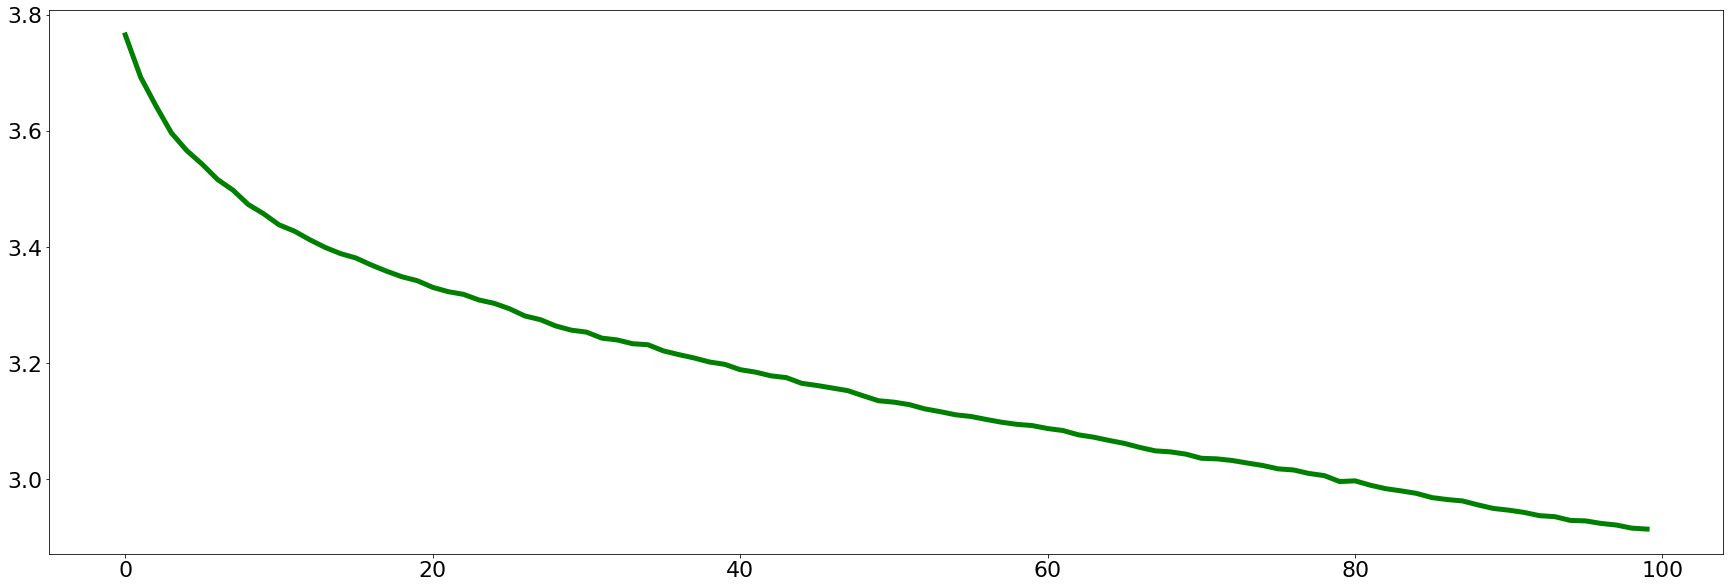

In [44]:
plt.figure(figsize=(30, 10))
plt.rcParams.update({'font.size': 22})
plt.plot(rmseList, linewidth=5, color='green')

<span style="color:black; font-weight:700;font-size:18px"> Όπως περιμέναμε, το rmse καθώς ανεβαίνει το k μειώνεται, οι προβλέψεις δηλαδή είναι καλύτερες. Λογικό, καθώς υψηλότερο k αντιστοιχεί σε καλύτερη προσέγγιση του αρχικού πίνακα. </span>

# Step 5

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το αρχείο για τις μέσες τιμές των user_id και το train_set. </span>

In [48]:
mean_stars_user = pd.read_csv("mean_stars_users.csv")
mean_stars_user.columns = ['user_id_num', 'user_id', 'mean_star']
mean_stars_user.columns
mean_stars_user.head

<bound method NDFrame.head of       user_id_num                 user_id  mean_star
0               0  -2cKJFFNJ9XVyWBt62mWvA   4.481481
1               1  -4qa2JVDEC_QPVWcZ1nHkQ   3.232558
2               2  -6GY04bTPM2Zo4z0GN4a1A   4.416667
3               3  -6nlh2IbzCbGhWndMLZt1g   4.076923
4               4  -7-d8x5w5c9QolAMgPTKZg   3.558140
...           ...                     ...        ...
6956         6956  zvq6qxc2IVA08jaUelUMRw   3.676923
6957         6957  zwCkk1Pd88uZpvIQRRFo-A   3.555556
6958         6958  zwIhFlA84tTLvSSjHc6IgA   3.352941
6959         6959  zyNrXvJyYdC34tS6BcCykA   4.031915
6960         6960  zzBhA0M7NNBMYoWj48h53A   3.166667

[6961 rows x 3 columns]>

In [49]:
train_set = pd.read_csv("phily_users_businesses_stars_train.csv")

<span style="color:black; font-weight:700;font-size:18px"> Δημιουργούμε ένα λεξικό που αντιστοιχεί κάθε user_id με έναν αριθμό από 0 έως Ν-1 και αντικαθιστούμε στο train_set το user_id με τον αριθμό που του αντιστοιχεί, το κωδικοποιούμε κατά κάποιον τρόπο. </span>

In [50]:
N = train_set.drop_duplicates(subset = ['user_id'])

enumN = np.arange(6962)
dictN = dict(zip(N['user_id'].values, enumN))

train_set["user_id"].replace(dictN, inplace= True)
train_set.head

<bound method NDFrame.head of         user_id             business_id  stars
0             0  eMiN8nm70jjKg8izikVWDA    4.0
1             1  qTb5bEgZdrwx2A3mNVK5mg    5.0
2             2  Auc20f0uYTIwPnJIqcdmNw    4.0
3             3  j-qtdD55OLfSqfsWuQTDJg    2.0
4             4  ME7nOO4hHoCwkbssGqsyPA    5.0
...         ...                     ...    ...
271922     1251  0R2yKDNMUztQwgo8pG4z-Q    3.0
271923     4405  EtKSTHV5Qx_Q7Aur9o4kQQ    3.0
271924      698  d28lZlSps97FHhXZazJ8zA    4.0
271925     5474  lKU_kljhbEQKIPaM1Zbqiw    3.0
271926     1083  fcpHrRopilvsBwUajFB5rw    2.0

[271927 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Χρησιμοποιείς το ίδιο dictionary για να κωδικοποιήσεις το DataFrame με τους users και το μέσο όρο αστεριών τους. </span>

In [51]:
mean_stars_user["user_id"].replace(dictN, inplace= True)
mean_stars_user.head

<bound method NDFrame.head of       user_id_num  user_id  mean_star
0               0     2532   4.481481
1               1     1751   3.232558
2               2      919   4.416667
3               3     6954   4.076923
4               4     4162   3.558140
...           ...      ...        ...
6956         6956     3410   3.676923
6957         6957     4929   3.555556
6958         6958     3934   3.352941
6959         6959     2095   4.031915
6960         6960      582   3.166667

[6961 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε την ίδια δουλειά για τα business_id με ένα λεξικό με κλειδιά τα business_id και τιμές μια τιμή από 0 έως Μ-1. </span>

In [52]:
M = train_set.drop_duplicates(subset = ['business_id'])

enumM = np.arange(4065)
dictM = dict(map(lambda i,j : (i,j) , M['business_id'].values,enumM))

train_set["business_id"].replace(dictM, inplace= True)
train_set.head

<bound method NDFrame.head of         user_id  business_id  stars
0             0            0    4.0
1             1            1    5.0
2             2            2    4.0
3             3            3    2.0
4             4            4    5.0
...         ...          ...    ...
271922     1251         1043    3.0
271923     4405          366    3.0
271924      698         1950    4.0
271925     5474          459    3.0
271926     1083         1658    2.0

[271927 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Τώρα κάνω ένα DataFrame με δύο στήλες, στην μία το user_id κωδικοποιημένο από το dictionary και στην άλλη το mean του χρήστη. Μετά τα κάνω sort σύμφωνα με το κωδικοποιημένο user_id και τα βάζω σε μια λίστα, με αυτόν τον τρόπο υπάρχει 1-1 αντιστοίχηση του index της λίστας με το user_id. Άμα γράψω δηλαδή meanL[32], θα πάρω το μέσο όρο του χρήστη '32'.</span>

In [53]:
meanList = mean_stars_user[['user_id','mean_star']].values
meanDf = pd.DataFrame(meanList)
meanDf.columns = ['user_id','mean_star']
meanDf.sort_values(by = ['user_id'], ascending=True, inplace=True)
meanL = meanDf['mean_star'].values
meanDf.head

<bound method NDFrame.head of       user_id  mean_star
1832      0.0   3.969697
5406      1.0   4.306122
112       2.0   3.902174
2655      3.0   2.625000
4615      4.0   4.708333
...       ...        ...
1815   6956.0   3.666667
5016   6957.0   4.187500
6712   6958.0   4.461538
2617   6959.0   4.384615
243    6960.0   3.714286

[6961 rows x 2 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Τώρα στην νέα στήλη τι κάνω: παίρνω το user_id και το χρησιμοποιώ ως index της λίστας meanL -που όπως είπα υπάρχει 1-1 αντιστοιχία index με user_id- και με αυτόν τον τρόπο βρίσκω το μέσο όρο των αστεριών του user. Στην νέα στήλη λοιπόν βάζω την διαφορά της βαθμολογίας με το μέσο όρο. </span>

In [54]:
train_set['stars_minus_diff'] = train_set.apply(lambda x: x['stars'] - meanL[int(x['user_id'])], axis = 1)
train_set.head

<bound method NDFrame.head of         user_id  business_id  stars  stars_minus_diff
0             0            0    4.0          0.030303
1             1            1    5.0          0.693878
2             2            2    4.0          0.097826
3             3            3    2.0         -0.625000
4             4            4    5.0          0.291667
...         ...          ...    ...               ...
271922     1251         1043    3.0         -0.844444
271923     4405          366    3.0         -0.800000
271924      698         1950    4.0          0.073034
271925     5474          459    3.0         -0.576923
271926     1083         1658    2.0         -1.515789

[271927 rows x 4 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Εδώ υλοποιείται ο αλγόριθμος ucf, παίρνει 3 ορίσματα, u,b,k όπου για κάθε u,b (user_id και business_id) γίνεται μια πρόβλεψη της βαθμολογίας σύμφωνα με το k. </span>

In [55]:
def ucf(u,b,k):
    bus_group = train_set.groupby('business_id')
    if(b not in train_set['business_id'].values):
        print("this business doesn't exist")
        return
    if(u not in train_set['user_id'].values):
        print("this user doesn't exist")
        return
    for bus_id, bus_data in bus_group:
        if(bus_id != b): continue
        ubPair = bus_data.loc[bus_data['user_id'] == u]
        ubPair = ubPair.loc[bus_data['business_id'] == b]
        ubPairL = ubPair.values
        if(u not in bus_data['user_id'].values):
            #print("user didn't review this store")
            break
        if(len((ubPairL)) > 1): ubPairL = ubPairL[0]
            
        # find cosine distance of all the rows of the grouped_by dataframe from
        # the (u,b) given pair. ubPair is: [u, b, stars_of_the_review]
        #cosDis = bus_data.apply(lambda row: 1 - cosine(row, ubPairL), axis=1)
        cosDis = bus_data.apply(lambda row: cosine(row, ubPairL), axis=1)
        # add the array of the distances to the grouped_by dataframe
        bus_data['dis_from_ub'] = cosDis
        # sort by the distances
        bus_data.sort_values(by = ['dis_from_ub'], ascending=False, inplace=True)
        
        cosDis = np.array(bus_data['dis_from_ub'].values)
        stars = np.array(bus_data['stars_minus_diff'].values)
        
        # we put 1:k because at index=0 we have the same value, where distance=1
        # we want JUST the neighbors
        # pollaplasiazoume 1 pros 1 ta stoixeia ths listas
        # kai meta briskoume to athroisma twn pollaplasiasmenwn
        mul = cosDis[1:k+1] * stars[1:k+1]
        numerator = mul.sum()
        denominator = cosDis[1:k+1].sum()
        
        
        # find the mean value of the reviews of the user u
        lru = mean_stars_user.loc[mean_stars_user['user_id_num'] == u].values
        ru = lru[0][2]
        
        #print(cosDis[1:k])
        #print(stars[1:k])
        #print(bus_data.head)
        #print(ubPairL)
        #print("Mean value of reviews:",ru,"numerator:",numerator,"denominator:",denominator)
        
        res = ru + numerator/denominator
        #print("Result:",res)
        return res
        break

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το test_set και κωδικοποιούμε τις στήλες user_id και business_id με τα dictionaries που αντιστοιχούν κάθε user_id και business_id σε έναν μοναδικό αριθμό. </span>

In [56]:
test_set = pd.read_csv("phily_users_businesses_stars_test.csv")

enumN = np.arange(6962)
dictN = dict(zip(N['user_id'].values, enumN))
test_set["user_id"].replace(dictN, inplace= True)


enumM = np.arange(4065)
dictM = dict(map(lambda i,j : (i,j) , M['business_id'].values,enumM))
test_set["business_id"].replace(dictM, inplace= True)
test_set.head

<bound method NDFrame.head of        user_id  business_id  stars
0         6035         2881    1.0
1         4046         2898    5.0
2          476         1737    4.0
3         1542         1860    2.0
4         5237         2582    4.0
...        ...          ...    ...
30209     6774          970    5.0
30210     1340          564    3.0
30211     5445         1044    2.0
30212     4117          149    5.0
30213     2136         1719    5.0

[30214 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Όπως το βήμα 4 θα πρέπει να δούμε ποιά ζευγάρια (u,b) του test_set ανήκουν στο train_set, προκειμένου να υπάρχει μια πρόβλεψη. </span>

In [57]:
mergedStuff = pd.merge(train_set, test_set, on=['user_id','business_id'], how='inner')
#mergedStuff.drop_duplicates(subset=['user_id','business_id'], inplace=True)
mergedStuff.drop(columns = ['stars_minus_diff','stars_y'], axis=1, inplace=True)
print("at the bottom see how many commons (u,b) pairs between test and train")
mergedStuff.head

at the bottom see how many commons (u,b) pairs between test and train


<bound method NDFrame.head of       user_id  business_id  stars_x
0         217          205      4.0
1         242          226      5.0
2         242          226      5.0
3         242          226      5.0
4         253          236      5.0
...       ...          ...      ...
3434      393         2702      5.0
3435     3482         1351      1.0
3436     6135          370      5.0
3437     2959          482      5.0
3438     4239         1317      5.0

[3439 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Βρίσκουμε το rmse για k=100. </span>

In [58]:
pairs = mergedStuff[['user_id','business_id','stars_x']].values

diff_squared = []
count = 0
for i in range(len(pairs)):
    if(i%500==0): print(i)
    x = ucf(pairs[i][0],pairs[i][1],100)
    if(x is None):
        continue
    #print(type(x),x,(pairs[i][2] - x)**2)
    diff_squared.append((pairs[i][2] - x)**2)
    count += 1

diff = np.array(diff_squared)
diff_div = diff / count
sumOfDiff = diff_div.sum()
rmse = np.sqrt(sumOfDiff)
print(count)
print("rmse of ucf with k=100:",rmse)

0
500
1000
1500
2000
2500
3000
3439
rmse of ucf with k=100: 1.2088221329415396


<span style="color:black; font-weight:700;font-size:18px"> Έχουμε δύο συναρτήσεις, η μία ακολουθεί την ίδια φιλοσοφία με την ucf, με κάθε τριάδα u,b,k κάνει μια πρόβλεψη, και εμείς σε ένα for-loop που διατρέχει την λίστα με τα k, περνάμε κάθε φορά μόνο ένα k και γίνεται μια πρόβλεψη, όχι μια λίστα όπως λέει η εκφώνηση </span>

In [59]:
def ucfPredictions(pairs,k):
    diff_squared = []
    count = 0
    for i in range(len(pairs)):
        #if(i%500==0): print(i)
        x = ucf(pairs[i][0],pairs[i][1],k)
        if(x is None):
            continue
        #print(type(x),x,(pairs[i][2] - x)**2)
        diff_squared.append((pairs[i][2] - x)**2)
        count += 1
    diff = np.array(diff_squared)
    diff_div = diff / count
    sumOfDiff = diff_div.sum()
    rmse = np.sqrt(sumOfDiff)
    return rmse

In [60]:
k = [1,2,3,5,8,10,12,15,20,25,30,40,50]
rmseL = []
start = time.time()
for i in k:
    print("~~~~~~~ k =",i,"~~~~~~~~~")
    rmseL.append(ucfPredictions(pairs,i))
end = time.time()

~~~~~~~ k = 1 ~~~~~~~~~
~~~~~~~ k = 2 ~~~~~~~~~
~~~~~~~ k = 3 ~~~~~~~~~
~~~~~~~ k = 5 ~~~~~~~~~
~~~~~~~ k = 8 ~~~~~~~~~
~~~~~~~ k = 10 ~~~~~~~~~
~~~~~~~ k = 12 ~~~~~~~~~
~~~~~~~ k = 15 ~~~~~~~~~
~~~~~~~ k = 20 ~~~~~~~~~
~~~~~~~ k = 25 ~~~~~~~~~
~~~~~~~ k = 30 ~~~~~~~~~
~~~~~~~ k = 40 ~~~~~~~~~
~~~~~~~ k = 50 ~~~~~~~~~


<span style="color:black; font-weight:700;font-size:18px"> Ο χρόνος που χρειάζεται </span>

In [61]:
print("Needed time for individual k:",end - start)

Needed time for individual k: 2480.95436501503


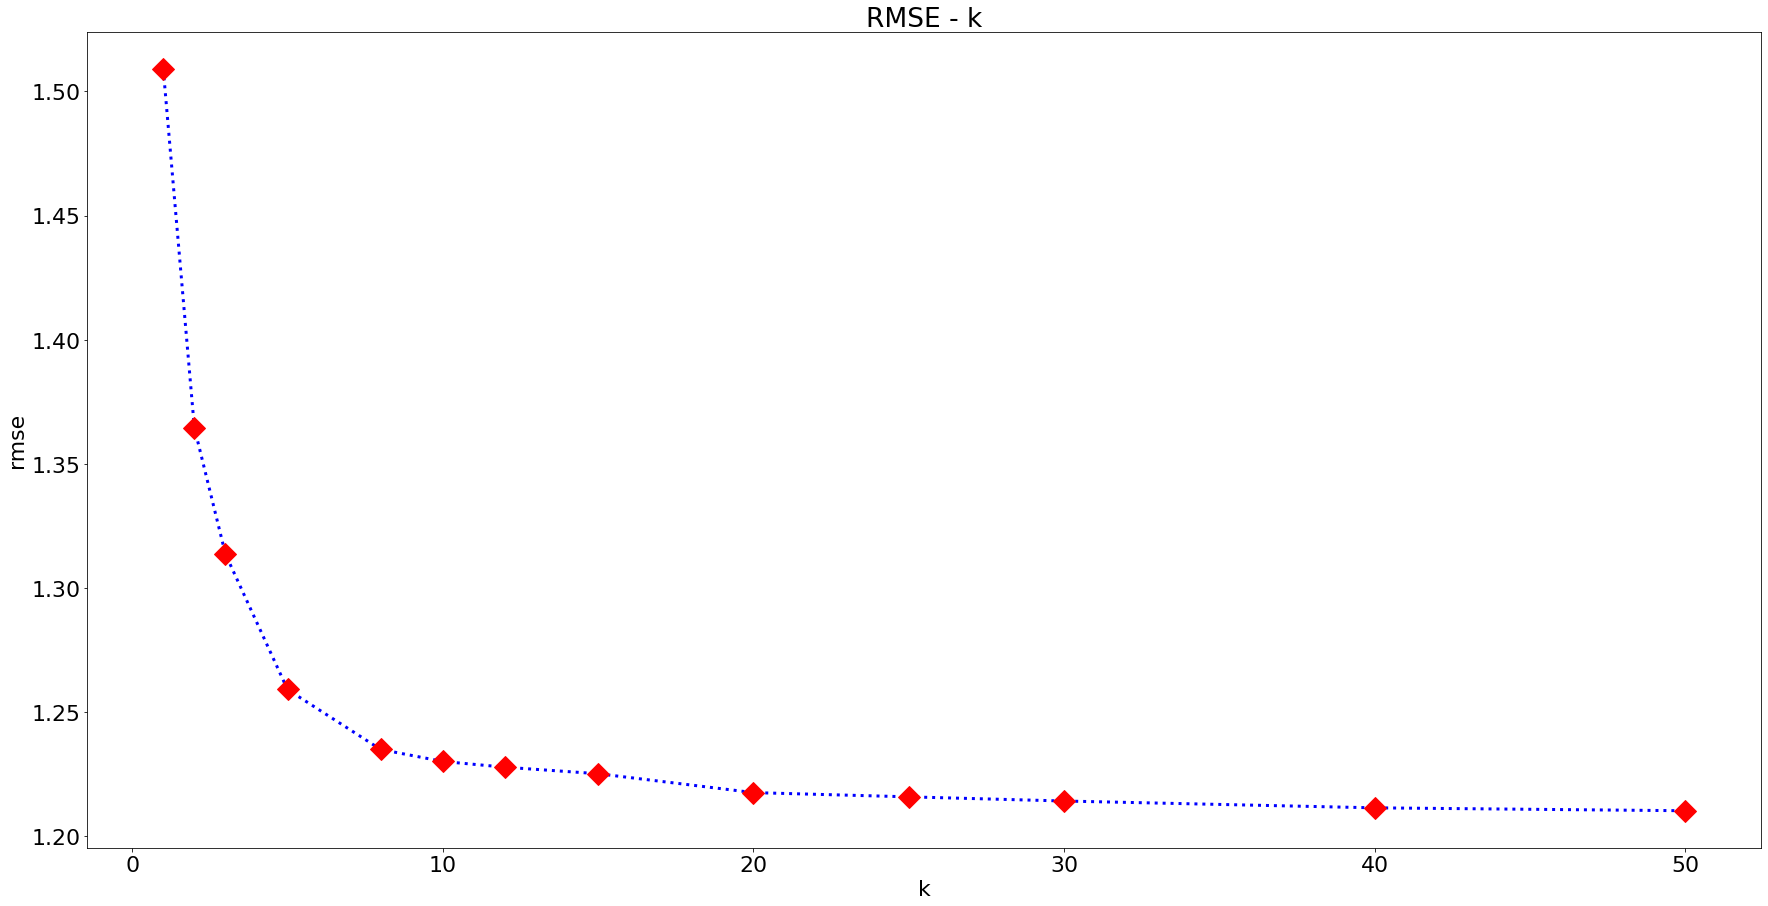

In [62]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 22})
plt.plot(k, rmseL, 'D:b', ms=15, mec = 'r', mfc = 'r', linewidth = 3)
plt.title('RMSE - k')
plt.xlabel('k')
plt.ylabel('rmse')
plt.show()

<span style="color:black; font-weight:700;font-size:18px"> Εδώ γίνεται η υλοποίηση της συνάρτησης που λέει η εκφώνηση, παίρνει σαν όρισμα u,b και μια λίστα ολόκληρη με όλα τα k. Ο χρόνος εκτέλεσης δεν αλλάζει δραματικά.</span>

In [63]:
def ucfPredictions(pairs,k):
    pred = np.array([])
    diff_squared = []
    count = 0
    for i in range(len(pairs)):
        #if(i%500==0): print(i)
        #x = ucf(pairs[i][0],pairs[i][1],k)
        for j in k:
            predX = ucf(pairs[i][0],pairs[i][1],j)
            pred = np.append(pred, predX)
        
        if(x is None):
            continue
        #print(pred)
        pred = (pairs[i][2] - pred)**2
        #diff_squared.append((pairs[i][2] - x)**2)
        diff_squared.append(pred)
        pred = np.array([])
        count += 1
    diff_squared = np.array(diff_squared)
    sumOfDiff = diff_squared.sum(axis=0)
    sumOfDiff = sumOfDiff/count
    rmse = np.sqrt(sumOfDiff)

    return rmse

In [64]:
start = time.time()
k = [1,2,3,5,8,10,12,15,20,25,30,40,50]
rmseList = ucfPredictions(pairs,k)
end = time.time()

In [65]:
print("Needed time for list of k:",end - start)

Needed time for list of k: 2273.0874297618866


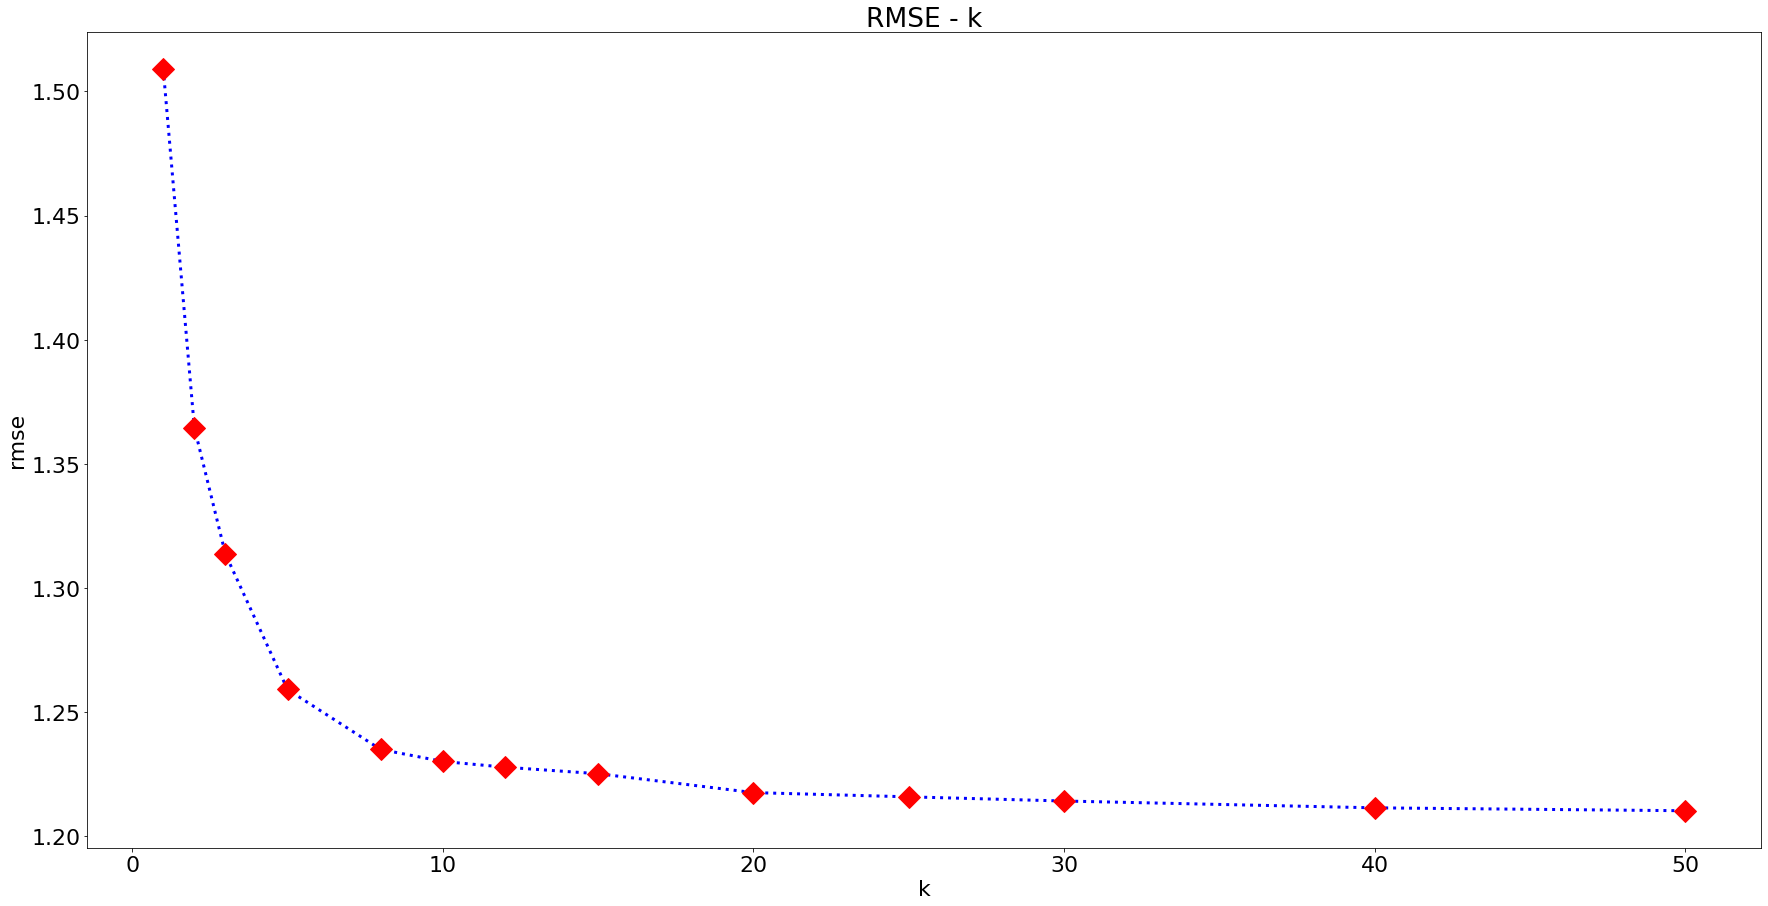

In [66]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 22})
plt.plot(k, rmseList, 'D:b', ms=15, mec = 'r', mfc = 'r', linewidth = 3)
plt.title('RMSE - k')
plt.xlabel('k')
plt.ylabel('rmse')
plt.show()

# Step 6

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το αρχείο για τις μέσες τιμές των user_id και το train_set. </span>

In [67]:
mean_stars_user = pd.read_csv("mean_stars_users.csv")
mean_stars_user.columns = ['user_id_num', 'user_id', 'mean_star']
mean_stars_user.columns
mean_stars_user.head

<bound method NDFrame.head of       user_id_num                 user_id  mean_star
0               0  -2cKJFFNJ9XVyWBt62mWvA   4.481481
1               1  -4qa2JVDEC_QPVWcZ1nHkQ   3.232558
2               2  -6GY04bTPM2Zo4z0GN4a1A   4.416667
3               3  -6nlh2IbzCbGhWndMLZt1g   4.076923
4               4  -7-d8x5w5c9QolAMgPTKZg   3.558140
...           ...                     ...        ...
6956         6956  zvq6qxc2IVA08jaUelUMRw   3.676923
6957         6957  zwCkk1Pd88uZpvIQRRFo-A   3.555556
6958         6958  zwIhFlA84tTLvSSjHc6IgA   3.352941
6959         6959  zyNrXvJyYdC34tS6BcCykA   4.031915
6960         6960  zzBhA0M7NNBMYoWj48h53A   3.166667

[6961 rows x 3 columns]>

In [68]:
train_set = pd.read_csv("phily_users_businesses_stars_train.csv")
#train_set['stars'] = train_set['stars'] - mean_stars_user['mean_star']

<span style="color:black; font-weight:700;font-size:18px"> Δημιουργούμε ένα λεξικό που αντιστοιχεί κάθε user_id με έναν αριθμό από 0 έως Ν-1 και αντικαθιστούμε στο train_set το user_id με τον αριθμό που του αντιστοιχεί, το κωδικοποιούμε κατά κάποιον τρόπο. </span>

In [69]:
N = train_set.drop_duplicates(subset = ['user_id'])
# kane ena dictionary poy antistoixei kathe user_id me ena dictionary.
enumN = np.arange(6962)
dictN = dict(zip(N['user_id'].values, enumN))

train_set["user_id"].replace(dictN, inplace= True)
train_set.head

<bound method NDFrame.head of         user_id             business_id  stars
0             0  eMiN8nm70jjKg8izikVWDA    4.0
1             1  qTb5bEgZdrwx2A3mNVK5mg    5.0
2             2  Auc20f0uYTIwPnJIqcdmNw    4.0
3             3  j-qtdD55OLfSqfsWuQTDJg    2.0
4             4  ME7nOO4hHoCwkbssGqsyPA    5.0
...         ...                     ...    ...
271922     1251  0R2yKDNMUztQwgo8pG4z-Q    3.0
271923     4405  EtKSTHV5Qx_Q7Aur9o4kQQ    3.0
271924      698  d28lZlSps97FHhXZazJ8zA    4.0
271925     5474  lKU_kljhbEQKIPaM1Zbqiw    3.0
271926     1083  fcpHrRopilvsBwUajFB5rw    2.0

[271927 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Χρησιμοποιείς το ίδιο dictionary για να κωδικοποιήσεις το DataFrame με τους users και το μέσο όρο αστεριών τους. </span>

In [70]:
mean_stars_user["user_id"].replace(dictN, inplace= True)
mean_stars_user.head

<bound method NDFrame.head of       user_id_num  user_id  mean_star
0               0     2532   4.481481
1               1     1751   3.232558
2               2      919   4.416667
3               3     6954   4.076923
4               4     4162   3.558140
...           ...      ...        ...
6956         6956     3410   3.676923
6957         6957     4929   3.555556
6958         6958     3934   3.352941
6959         6959     2095   4.031915
6960         6960      582   3.166667

[6961 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Κάνουμε την ίδια δουλειά για τα business_id με ένα λεξικό με κλειδιά τα business_id και τιμές μια τιμή από 0 έως Μ-1. </span>

In [71]:
M = train_set.drop_duplicates(subset = ['business_id'])
enumM = np.arange(4065)
dictM = dict(map(lambda i,j : (i,j) , M['business_id'].values,enumM))

train_set["business_id"].replace(dictM, inplace= True)
train_set.head

<bound method NDFrame.head of         user_id  business_id  stars
0             0            0    4.0
1             1            1    5.0
2             2            2    4.0
3             3            3    2.0
4             4            4    5.0
...         ...          ...    ...
271922     1251         1043    3.0
271923     4405          366    3.0
271924      698         1950    4.0
271925     5474          459    3.0
271926     1083         1658    2.0

[271927 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Τώρα κάνω ένα DataFrame με δύο στήλες, στην μία το user_id κωδικοποιημένο από το dictionary και στην άλλη το mean του χρήστη. Μετά τα κάνω sort σύμφωνα με το κωδικοποιημένο user_id και τα βάζω σε μια λίστα, με αυτόν τον τρόπο υπάρχει 1-1 αντιστοίχηση του index της λίστας με το user_id. Άμα γράψω δηλαδή meanL[32], θα πάρω το μέσο όρο του χρήστη '32'.</span>

In [72]:
meanList = mean_stars_user[['user_id','mean_star']].values
meanDf = pd.DataFrame(meanList)
meanDf.columns = ['user_id','mean_star']
meanDf.sort_values(by = ['user_id'], ascending=True, inplace=True)
meanL = meanDf['mean_star'].values
meanDf.head

<bound method NDFrame.head of       user_id  mean_star
1832      0.0   3.969697
5406      1.0   4.306122
112       2.0   3.902174
2655      3.0   2.625000
4615      4.0   4.708333
...       ...        ...
1815   6956.0   3.666667
5016   6957.0   4.187500
6712   6958.0   4.461538
2617   6959.0   4.384615
243    6960.0   3.714286

[6961 rows x 2 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Τώρα στην νέα στήλη τι κάνω: παίρνω το user_id και το χρησιμοποιώ ως index της λίστας meanL -που όπως είπα υπάρχει 1-1 αντιστοιχία index με user_id- και με αυτόν τον τρόπο βρίσκω το μέσο όρο των αστεριών του user. Στην νέα στήλη λοιπόν βάζω την διαφορά της βαθμολογίας με το μέσο όρο. </span>

In [73]:
train_set['stars_minus_diff'] = train_set.apply(lambda x: x['stars'] - meanL[int(x['user_id'])], axis = 1)
train_set.head

<bound method NDFrame.head of         user_id  business_id  stars  stars_minus_diff
0             0            0    4.0          0.030303
1             1            1    5.0          0.693878
2             2            2    4.0          0.097826
3             3            3    2.0         -0.625000
4             4            4    5.0          0.291667
...         ...          ...    ...               ...
271922     1251         1043    3.0         -0.844444
271923     4405          366    3.0         -0.800000
271924      698         1950    4.0          0.073034
271925     5474          459    3.0         -0.576923
271926     1083         1658    2.0         -1.515789

[271927 rows x 4 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Εδώ υλοποιείται ο αλγόριθμος icf, παίρνει 3 ορίσματα, u,b,k όπου για κάθε u,b (user_id και business_id) γίνεται μια πρόβλεψη της βαθμολογίας σύμφωνα με το k. </span>

In [74]:
def icf(u,b,k):
    #bus_group = train_set.groupby('business_id')
    user_group = train_set.groupby('user_id')
    if(b not in train_set['business_id'].values):
        print("this business doesn't exist")
        return
    if(u not in train_set['user_id'].values):
        print("this user doesn't exist")
        return
    for user_id, user_data in user_group:
        if(user_id != u): continue
        ubPair = user_data.loc[user_data['user_id'] == u]
        ubPair = ubPair.loc[user_data['business_id'] == b]
        ubPairL = ubPair.values
        
        # check if busienss has been reviewed from user u
        if(b not in user_data['business_id'].values):
            #print("user didn't review this store")
            break
        if(len((ubPairL)) > 1): ubPairL = ubPairL[0]
            
        # find cosine distance of all the rows of the grouped_by dataframe from
        # the (u,b) given pair. ubPair is: [u, b, stars_of_the_review]
        #cosDis = bus_data.apply(lambda row: 1 - cosine(row, ubPairL), axis=1)
        cosDis = user_data.apply(lambda row: cosine(row, ubPairL), axis=1)
        # add the array of the distances to the grouped_by dataframe
        user_data['dis_from_ub'] = cosDis
        # sort by the distances
        user_data.sort_values(by = ['dis_from_ub'], ascending=False, inplace=True)
        
        cosDis = np.array(user_data['dis_from_ub'].values)
        stars = np.array(user_data['stars_minus_diff'].values)
        
        # we put 1:k because at index=0 we have the same value, where distance=1
        # we want JUST the neighbors
        # pollaplasiazoume 1 pros 1 ta stoixeia ths listas
        # kai meta briskoume to athroisma twn pollaplasiasmenwn
        mul = cosDis[1:k+1] * stars[1:k+1]
        numerator = mul.sum()
        denominator = cosDis[1:k+1].sum()
        
        
        # find the mean value of the reviews of the user u
        lru = mean_stars_user.loc[mean_stars_user['user_id_num'] == u].values
        ru = lru[0][2]
        
        #print(cosDis[1:k])
        #print(stars[1:k])
        #print(bus_data.head)
        #print(ubPairL)
        #print("Mean value of reviews:",ru,"numerator:",numerator,"denominator:",denominator)
        
        res = ru + numerator/denominator
        #print("Result:",res)
        return res
        break

<span style="color:black; font-weight:700;font-size:18px"> Διαβάζουμε το test_set και κωδικοποιούμε τις στήλες user_id και business_id με τα dictionaries που αντιστοιχούν κάθε user_id και business_id σε έναν μοναδικό αριθμό. </span>

In [75]:
test_set = pd.read_csv("phily_users_businesses_stars_test.csv")

In [76]:
# encode test set 

In [77]:
enumN = np.arange(6962)
dictN = dict(zip(N['user_id'].values, enumN))
test_set["user_id"].replace(dictN, inplace= True)


enumM = np.arange(4065)
dictM = dict(map(lambda i,j : (i,j) , M['business_id'].values,enumM))
test_set["business_id"].replace(dictM, inplace= True)
test_set.head

<bound method NDFrame.head of        user_id  business_id  stars
0         6035         2881    1.0
1         4046         2898    5.0
2          476         1737    4.0
3         1542         1860    2.0
4         5237         2582    4.0
...        ...          ...    ...
30209     6774          970    5.0
30210     1340          564    3.0
30211     5445         1044    2.0
30212     4117          149    5.0
30213     2136         1719    5.0

[30214 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Όπως το βήμα 4 θα πρέπει να δούμε ποιά ζευγάρια (u,b) του test_set ανήκουν στο train_set, προκειμένου να υπάρχει μια πρόβλεψη. </span>

In [78]:
mergedStuff = pd.merge(train_set, test_set, on=['user_id','business_id'], how='inner')
#mergedStuff.drop_duplicates(subset=['user_id','business_id'], inplace=True)
mergedStuff.drop(columns = ['stars_minus_diff','stars_y'], axis=1, inplace=True)
print("at the bottom see how many commons (u,b) pairs between test and train")
mergedStuff.head

at the bottom see how many commons (u,b) pairs between test and train


<bound method NDFrame.head of       user_id  business_id  stars_x
0         217          205      4.0
1         242          226      5.0
2         242          226      5.0
3         242          226      5.0
4         253          236      5.0
...       ...          ...      ...
3434      393         2702      5.0
3435     3482         1351      1.0
3436     6135          370      5.0
3437     2959          482      5.0
3438     4239         1317      5.0

[3439 rows x 3 columns]>

<span style="color:black; font-weight:700;font-size:18px"> Βρίσκουμε το rmse για k=100. </span>

In [79]:
pairs = mergedStuff[['user_id','business_id','stars_x']].values

diff_squared = []
count = 0
for i in range(len(pairs)):
    #if(i%500==0): print(i)
    x = icf(pairs[i][0],pairs[i][1],100)
    if(x is None):
        continue
    #print(type(x),x,(pairs[i][2] - x)**2)
    diff_squared.append((pairs[i][2] - x)**2)
    count += 1

diff = np.array(diff_squared)
diff_div = diff / count
sumOfDiff = diff_div.sum()
rmse = np.sqrt(sumOfDiff)
print(count)
print("rmse of ucf with k=100:",rmse)

3439
rmse of ucf with k=100: 1.3288219036401505


<span style="color:black; font-weight:700;font-size:18px"> Έχουμε δύο συναρτήσεις, η μία ακολουθεί την ίδια φιλοσοφία με την icf, με κάθε τριάδα u,b,k κάνει μια πρόβλεψη, και εμείς σε ένα for-loop που διατρέχει την λίστα με τα k, περνάμε κάθε φορά μόνο ένα k και γίνεται μια πρόβλεψη, όχι μια λίστα όπως λέει η εκφώνηση </span>

In [80]:
def icfPredictions(pairs,k):
    diff_squared = []
    count = 0
    for i in range(len(pairs)):
        #if(i%500==0): print(i)
        x = icf(pairs[i][0],pairs[i][1],k)
        if(x is None):
            continue
        #print(type(x),x,(pairs[i][2] - x)**2)
        diff_squared.append((pairs[i][2] - x)**2)
        count += 1
    diff = np.array(diff_squared)
    diff_div = diff / count
    sumOfDiff = diff_div.sum()
    rmse = np.sqrt(sumOfDiff)
    return rmse

In [81]:
k = [1,2,3,5,8,10,12,15,20,25,30,40,50]
rmseL = []
start = time.time()
for i in k:
    print("~~~~~~~ k =",i,"~~~~~~~~~")
    rmseL.append(icfPredictions(pairs,i))
end = time.time()

~~~~~~~ k = 1 ~~~~~~~~~
~~~~~~~ k = 2 ~~~~~~~~~
~~~~~~~ k = 3 ~~~~~~~~~
~~~~~~~ k = 5 ~~~~~~~~~
~~~~~~~ k = 8 ~~~~~~~~~
~~~~~~~ k = 10 ~~~~~~~~~
~~~~~~~ k = 12 ~~~~~~~~~
~~~~~~~ k = 15 ~~~~~~~~~
~~~~~~~ k = 20 ~~~~~~~~~
~~~~~~~ k = 25 ~~~~~~~~~
~~~~~~~ k = 30 ~~~~~~~~~
~~~~~~~ k = 40 ~~~~~~~~~
~~~~~~~ k = 50 ~~~~~~~~~


<span style="color:black; font-weight:700;font-size:18px"> Ο χρόνος που χρειάζεται </span>

In [82]:
print("Needed time for individual k:",end - start)

Needed time for individual k: 2711.735929965973


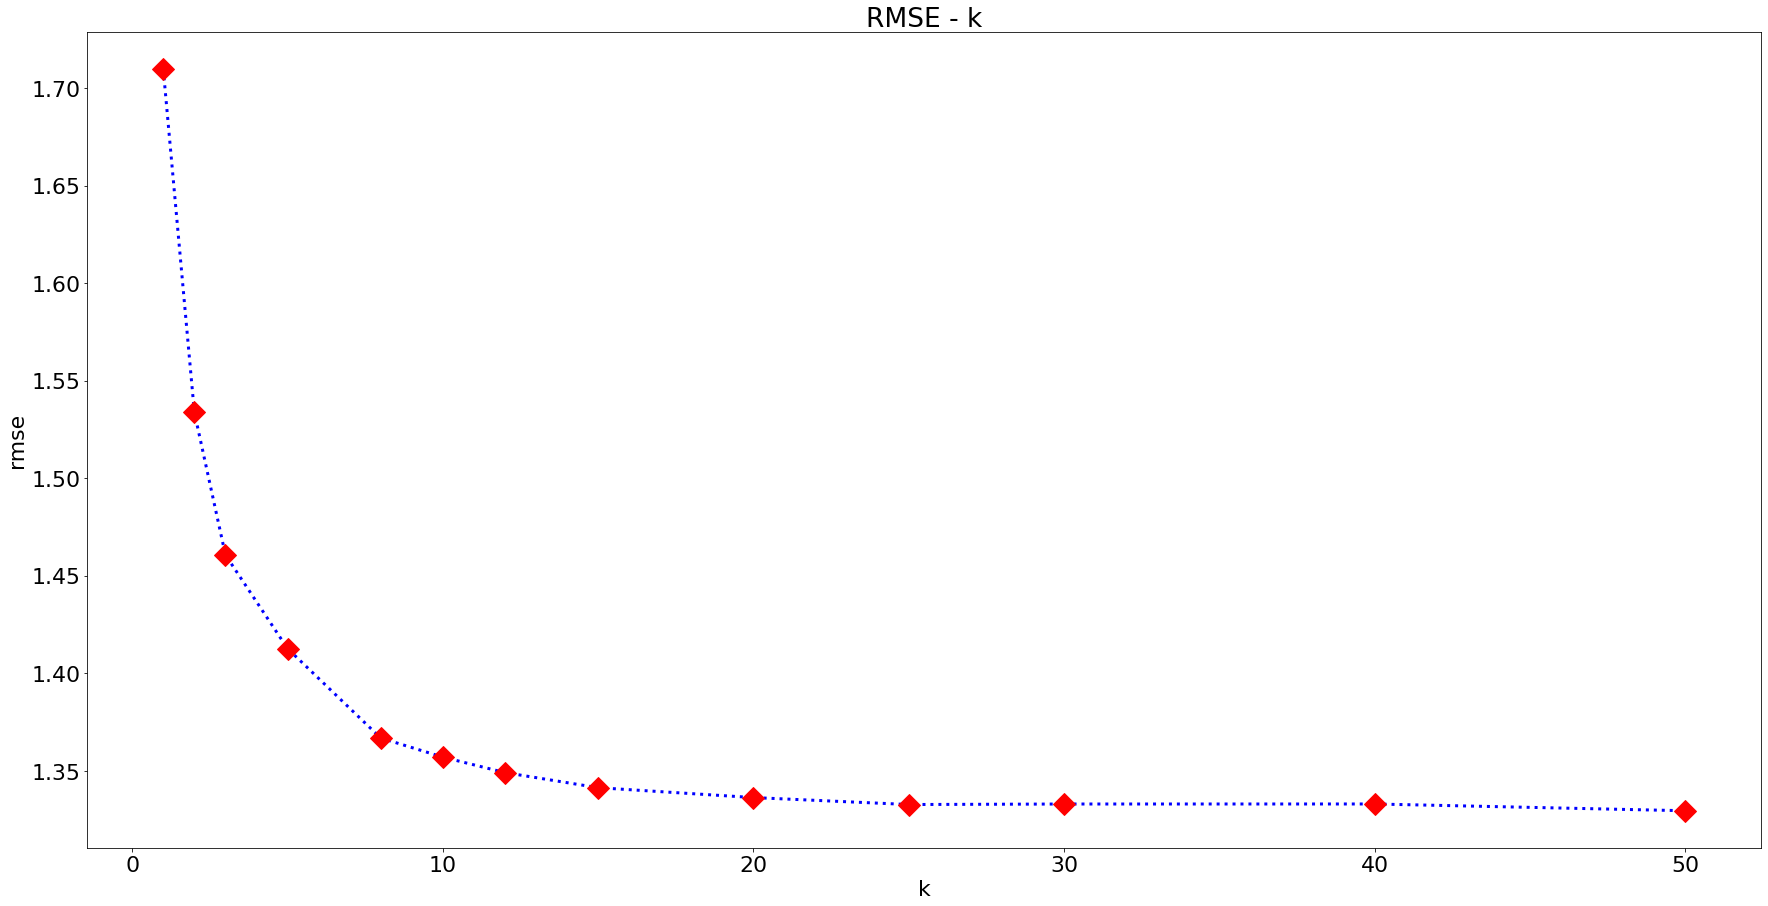

In [83]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 22})
plt.plot(k, rmseL, 'D:b', ms=15, mec = 'r', mfc = 'r', linewidth = 3)
plt.title('RMSE - k')
plt.xlabel('k')
plt.ylabel('rmse')
plt.show()

<span style="color:black; font-weight:700;font-size:18px"> Εδώ γίνεται η υλοποίηση της συνάρτησης που λέει η εκφώνηση, παίρνει σαν όρισμα u,b και μια λίστα ολόκληρη με όλα τα k. Ο χρόνος εκτέλεσης δεν αλλάζει δραματικά.</span>

In [84]:
def icfPredictions(pairs,k):
    pred = np.array([])
    diff_squared = []
    count = 0
    for i in range(len(pairs)):
        #if(i%500==0): print(i)
        #x = ucf(pairs[i][0],pairs[i][1],k)
        for j in k:
            predX = icf(pairs[i][0],pairs[i][1],j)
            pred = np.append(pred, predX)
        
        if(x is None):
            continue
        #print(pred)
        pred = (pairs[i][2] - pred)**2
        #diff_squared.append((pairs[i][2] - x)**2)
        diff_squared.append(pred)
        pred = np.array([])
        count += 1
    diff_squared = np.array(diff_squared)
    sumOfDiff = diff_squared.sum(axis=0)
    sumOfDiff = sumOfDiff/count
    rmse = np.sqrt(sumOfDiff)

    return rmse

In [85]:
start = time.time()
k = [1,2,3,5,8,10,12,15,20,25,30,40,50]
rmseList = ucfPredictions(pairs,k)
end = time.time()

In [86]:
print("Needed time for list of k:",end - start)

Needed time for list of k: 2351.555630683899


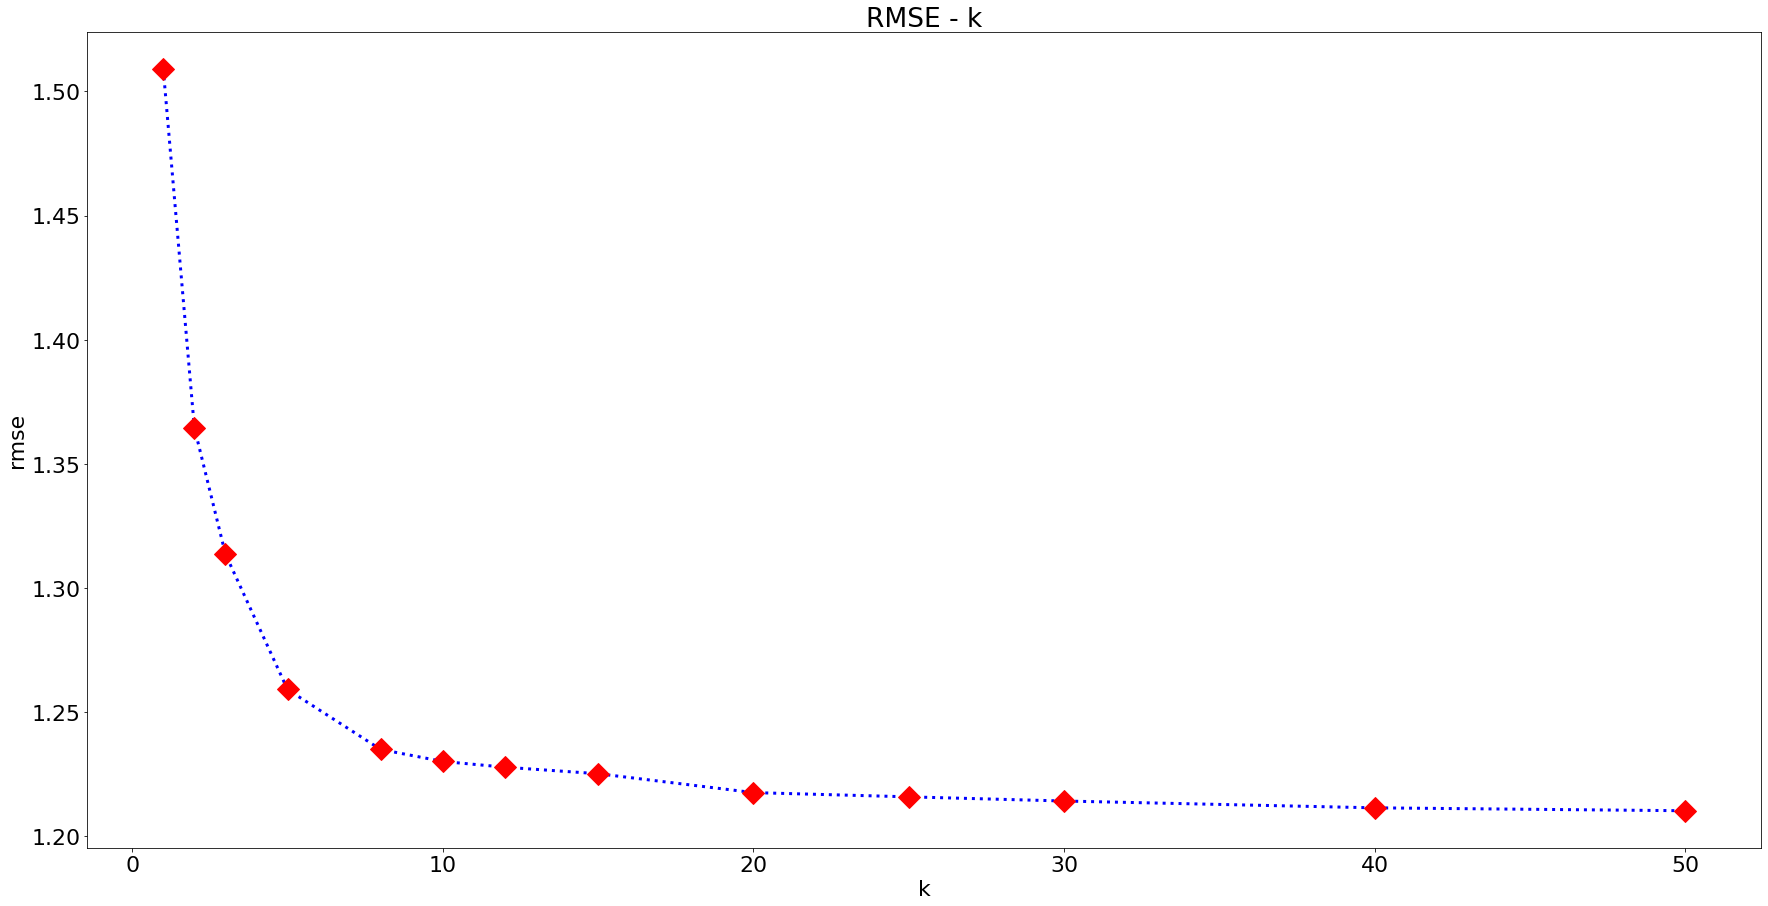

In [87]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 22})
plt.plot(k, rmseList, 'D:b', ms=15, mec = 'r', mfc = 'r', linewidth = 3)
plt.title('RMSE - k')
plt.xlabel('k')
plt.ylabel('rmse')
plt.show()